1.PREPARACIÓN DEL ENTORNO

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#2. CARGA DE DATOS

In [4]:
path= "/content/drive/MyDrive/Bootcamp/BBDD/vgsales (1).csv"
df= pd.read_csv(path)

In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


3. EXPLORACION INICIAL DE DATOS

In [6]:
#Con esto visualizo las ultimas 5 filas del DataFrame
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [7]:
# Acá obtengo información general del Data Frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


*  Con esto podemos observar que el total de datos deberían ser 16598, pero tanto en la columna Year, como en Publisher tienen menos registros.

In [8]:
# A continuación utilizo describe() que me permite visualizar los datos estadísticos del DataFrame
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.61,4791.85,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.41,5.83,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.26,0.82,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.15,0.51,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.08,0.31,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.05,0.19,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.54,1.56,0.01,0.06,0.17,0.47,82.74


4. LIMPIEZA DE DATOS



- Identifica y maneja los datos faltantes utilizando técnicas apropiadas (relleno con valores estadísticos, interpolación, eliminación, etc.).


In [9]:
# Ver cuántos son los nulos que hay por columna
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


* Con esto comprobamos que la columna Year tiene 271 datos nulos y la columna Publisher tiene 58 valores nulos.
* Según la información anterior, he optado para el caso de la columna Publisher rellenar los datos faltantes con la moda, que estadísticamente es el dato que más se repite.
En este caso los datos faltantes sólo corresponden al 0.3% del total de datos.

In [10]:
# Relleno valores faltantes de Publisher con la moda (valor más frecuente), ya que por ser dato tipo object no puedo sacar promedio
df['Publisher'] = df['Publisher'].fillna(df['Publisher'].mode()[0])

In [11]:
# Chequeamos y observamos que la columna Publisher está ok.
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


* En el caso de la Columna Year, al tratarse de números conviene revisar los datos para decidir qué estadística ocupar para rellenar los datos faltantes.

In [12]:
df["Year"].describe()

,Year
count,16327.000000
mean,2006.406443
std,5.828981
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


* Primero observamos que los datos están en formato float, y lo correcto es corrergirlos ya que los años deben ir en números enteros.
* En este caso faltan 271 datos que corresponden al 1.63% del total de datos, y si revisamos la descripción estadística podemos ver que tanto la media como la mediana tienen valores cercanos, por lo que en este caso he decidido utilizar el promedio (media)  como dato estadístico para rellenar los nulos.

In [13]:
df['Year'] = df['Year'].fillna(df['Year'].median()).astype(int)

In [14]:
#Verifico
df['Year']

,Year
0,2006
1,1985
2,2008
3,2009
4,1996
...,...
16593,2002
16594,2003
16595,2008
16596,2010


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


* Con esto corroboramos que los años están como números enteros y ya no hay nulos porque se indican los 16598 rows x columna en todo el Data Frame.
* Con astype int corregí el error del tipo en el que estaban los años (de float a int).

# 5. TRANSFORMACIÓN DE DATOS

-  Crear nuevas columnas basadas en operaciones con las columnas existentes

In [16]:
# Elegí crear ventas por ubicación.
df["Promedio_ventas_por_Region"] = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].mean(axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        16598 non-null  int64  
 1   Name                        16598 non-null  object 
 2   Platform                    16598 non-null  object 
 3   Year                        16598 non-null  int64  
 4   Genre                       16598 non-null  object 
 5   Publisher                   16598 non-null  object 
 6   NA_Sales                    16598 non-null  float64
 7   EU_Sales                    16598 non-null  float64
 8   JP_Sales                    16598 non-null  float64
 9   Other_Sales                 16598 non-null  float64
 10  Global_Sales                16598 non-null  float64
 11  Promedio_ventas_por_Region  16598 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


° Con este .info compruebo que se agregó a mi Data Frame la nueva columna creada

#Clasifica los datos:
Crear una columna que clasifique las ventas en categorías significativas (e.g., ‘Alta’, ‘Media’, ‘Baja’).

In [18]:
# Creo mi nueva columna
df["Categoria_Ventas"] = "Baja"

# Actualizo según los rangos para las otras categorías.
df.loc[(df["Global_Sales"] >= 1) & (df["Global_Sales"] < 5), "Categoria_Ventas"] = "Media"
df.loc[df["Global_Sales"] >= 5, "Categoria_Ventas"] = "Alta"


* Creé la nueva columna solicitada y la nombré: "Nivel_Ventas" que clasifica los juegos según su nivel de ventas globales:
- Baja: menos de 1 millón de unidades.
- Media: entre 1 y 5 millones de unidades.
- Alta: más de 5 millones de unidades.


In [19]:
# Compruebo que se creó la nueva columna correctamente.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        16598 non-null  int64  
 1   Name                        16598 non-null  object 
 2   Platform                    16598 non-null  object 
 3   Year                        16598 non-null  int64  
 4   Genre                       16598 non-null  object 
 5   Publisher                   16598 non-null  object 
 6   NA_Sales                    16598 non-null  float64
 7   EU_Sales                    16598 non-null  float64
 8   JP_Sales                    16598 non-null  float64
 9   Other_Sales                 16598 non-null  float64
 10  Global_Sales                16598 non-null  float64
 11  Promedio_ventas_por_Region  16598 non-null  float64
 12  Categoria_Ventas            16598 non-null  object 
dtypes: float64(6), int64(2), object


#AGRUPACIÓN Y AGREGACIÓN

Agrupación por múltiples columnas: Realiza agrupaciones por categorías como producto y tienda, producto y mes, etc.

In [20]:
# Ya que las categorías solicitadas no aparecen en este Data Set, decicí agrupar por año de lanzamiento y género, con el promedio de ventas globales
Grupo_columnas = df.groupby(['Year', 'Genre'])['Global_Sales'].mean().reset_index()

Grupo_columnas.head()
# Utilicé .head() para visualizar una muestra de las primeras 5 columnas para reducir espacio y comprobar lo realizado.

,Year,Genre,Global_Sales
0,1980,Action,0.3400
1,1980,Fighting,0.7700
2,1980,Misc,0.6775
3,1980,Shooter,3.5350
4,1980,Sports,0.4900


Aplicar funciones de agregación: Utiliza funciones como sum, mean, count, min, max, std, y var para obtener estadísticas descriptivas de cada grupo.

In [21]:
# Agrupé los datos por género
Grupo_por_genero = df.groupby("Genre")

# Apliqué algunas funciones estadísticas para las ventas globales (Global_Sales)
Estadisticas_genero = Grupo_por_genero["Global_Sales"].agg(["sum", "min", "max"]).reset_index()

Estadisticas_genero


,Genre,sum,min,max
0,Action,1751.18,0.01,21.40
1,Adventure,239.04,0.01,11.18
2,Fighting,448.91,0.01,13.04
3,Misc,809.96,0.01,29.02
4,Platform,831.37,0.01,40.24
5,Puzzle,244.95,0.01,30.26
6,Racing,732.04,0.01,35.82
7,Role-Playing,927.37,0.01,31.37
8,Shooter,1037.37,0.01,28.31
9,Simulation,392.20,0.01,24.76


° Con esto podemos observar la venta máxima,  venta mínima y la suma total de ventas por género.

# ANÁLISIS PERSONALIZADO CON APPLY

* Función personalizada: Aplica funciones personalizadas para realizar análisis específicos que no se pueden lograr con las funciones de agregación estándar.

In [22]:
# Hago una función que me entregue los datos estadísticos seleccionados del grupo a evaluar
def Resumen_1(grupo):
    promedio = grupo["Global_Sales"].mean()
    maximo = grupo["Global_Sales"].max()
    cantidad = grupo["Name"].nunique()

    return pd.Series({
        "Promedio_ventas": promedio,
        "Venta_máxima": maximo,
        "Cantidad_juegos": cantidad
    })

# Agrupé por género y plataforma, y aplico la función creada arriba.
df.groupby(["Genre", "Platform"], as_index=False).apply(Resumen_1, include_groups=False)


,Genre,Platform,Promedio_ventas,Venta_máxima,Cantidad_juegos
0,Action,2600,0.480984,2.20,61.0
1,Action,3DS,0.313297,4.58,182.0
2,Action,DC,0.420000,1.14,3.0
3,Action,DS,0.336910,11.90,343.0
4,Action,GB,1.320000,3.83,6.0
...,...,...,...,...,...
288,Strategy,Wii,0.209200,0.66,25.0
289,Strategy,WiiU,0.413333,1.11,3.0
290,Strategy,X360,0.361786,2.63,28.0
291,Strategy,XB,0.132381,0.73,21.0


* Uso 'as_index=False' para que las columnas de agrupación no pasen a ser el índice.
* utilicé 'include_groups=False' para evitar incluir automáticamente las columnas de agrupación dentro del grupo,evitando así las advertencias de futuras versiones de pandas.

# Análisis Descriptivo y Visualización

a)  Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.

In [23]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.61,4791.85,1.00,4151.25,8300.50,12449.75,16600.00
Year,16598.0,2006.42,5.78,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.26,0.82,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.15,0.51,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.08,0.31,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.05,0.19,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.54,1.56,0.01,0.06,0.17,0.47,82.74
Promedio_ventas_por_Region,16598.0,0.13,0.39,0.00,0.02,0.04,0.12,20.68


 *Con esto se puede observar los siguientes datos estadísticos:  
* Count: nos indica cantidad de datos.
* mean: es el promedio
* std: es la desviación estándar
* min, 25%, 50%, 75%, max: percentiles y extremos.

b) Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.

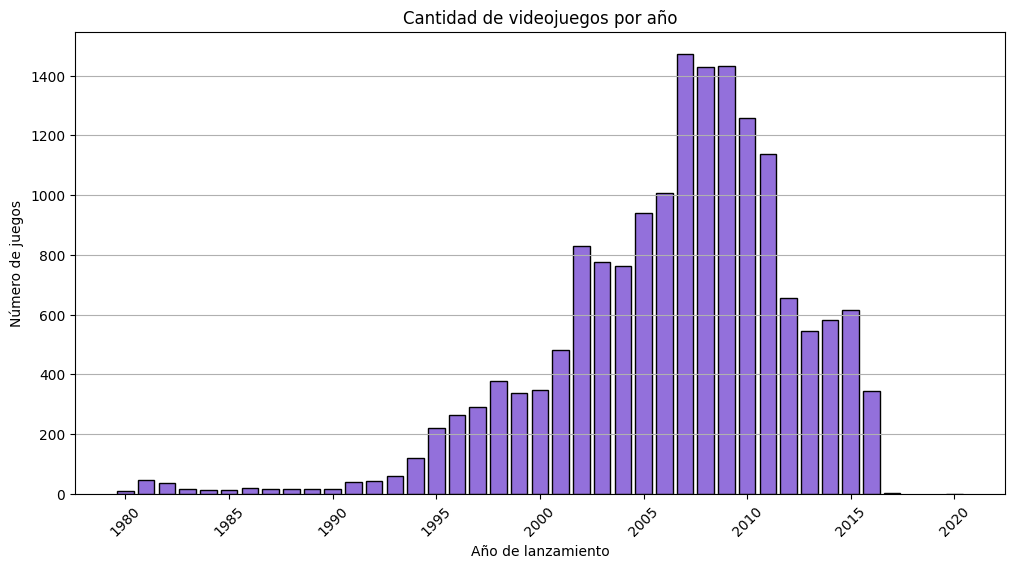

In [24]:
#Creo gráfico con la cantidad de video juegos por año
Cantidad_por_año = df["Year"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(Cantidad_por_año.index, Cantidad_por_año.values, color='mediumpurple', edgecolor='black')
plt.title('Cantidad de videojuegos por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.grid(axis='y')

#Mostrar
plt.show()


* En este gráfico podemos observar que los años con mayor cantidad de lanzamientos fueron 2007, 2008 y 2009.
* Es importante observa que hay una tendencia decreciente en el tiempo después de este peak.

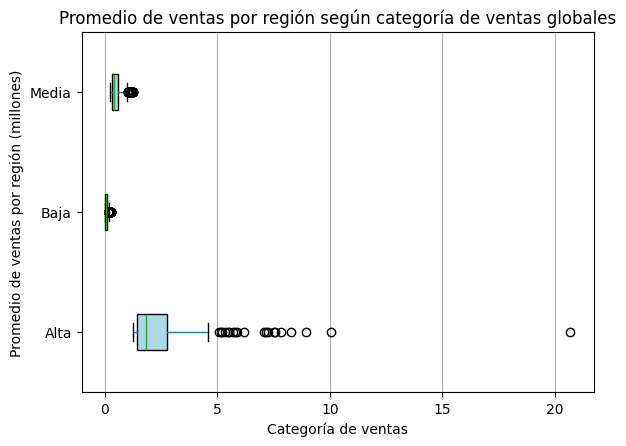

In [25]:
#Creo un gráfico tipo boxplot
df.boxplot(column="Promedio_ventas_por_Region", by="Categoria_Ventas",
           vert=False,
           patch_artist=True, boxprops=dict(facecolor="lightblue"))

plt.title("Promedio de ventas por región según categoría de ventas globales")
plt.suptitle('')
plt.xlabel("Categoría de ventas")
plt.ylabel("Promedio de ventas por región (millones)")
plt.grid(axis="y")

#Mostrar
plt.show()


 Analizando el gráfico se observa lo siguiente:
 * En la categoría de ventas "Alta" los juegos tienen un promedio de ventas por región muchísimo mayor y con una dispersión más amplia en comparación con las otras categorías.
 * En el caso de los juegos de la Categoría de Ventas "Media" muestran un promedio de ventas por región considerablemente menor que la categoría "Alta", pero aún así tienen una dispersión mayor que la categoría "Baja".
*Finalmente los juegos en la categoría de Ventas "Baja" muestran que tienen el promedio de ventas por región más bajo y la menor dispersión.

* Outliers: Se observan valores atípicos (outliers) en las categorías 'Media' y 'Alta', lo que nos podría indicar que hay algunos juegos dentro de estas categorías que tienen promedios de ventas por región excepcionalmente altos en comparación con la mayoría de los juegos en su misma categoría.



c) Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

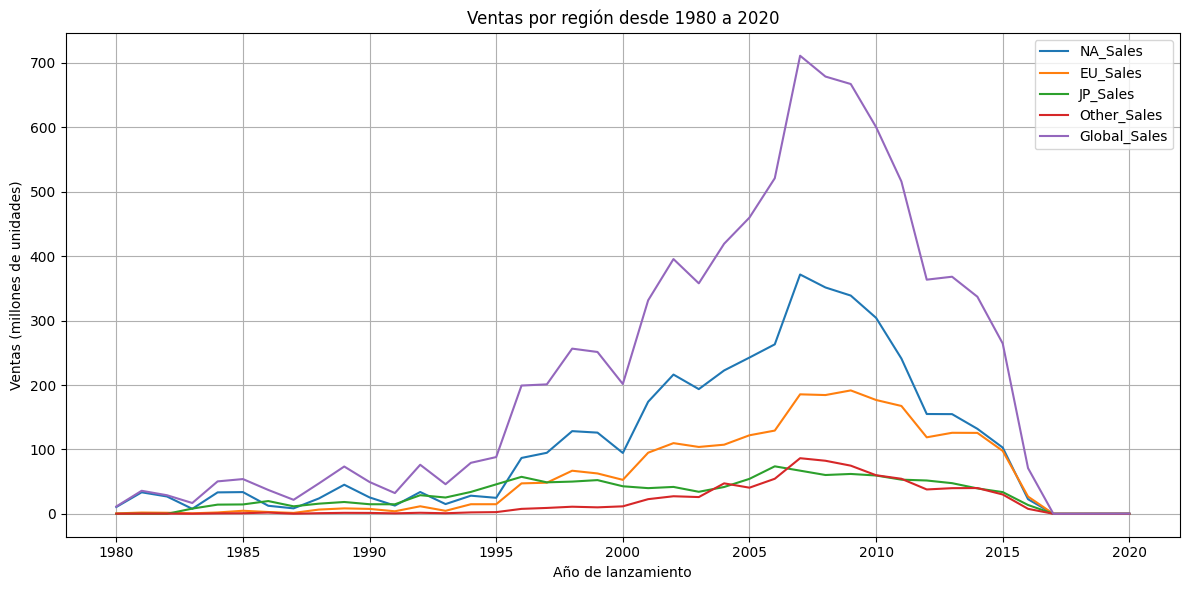

In [29]:
# Agrupamos las ventas por año (suma total por región)
ventas_por_año = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

# Crear gráfico de líneas
plt.figure(figsize=(12, 6))

for region in ventas_por_año.columns:
    plt.plot(ventas_por_año.index, ventas_por_año[region], label=region)

# Estética del gráfico
plt.title("Ventas por región desde 1980 a 2020")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas (millones de unidades)")
plt.legend()
plt.grid(True)
plt.tight_layout()

#Mostrar
plt.show()


En este gráfico podemos observar que las ventas globales (color morado) siguen la misma tendencia de las otras regiones, donde tienen un crecimiento moderado la primera década, para el año 1995 generar el primer salto, logrando su peak pasado el año 2005, más exacto en 2007. Luego vemos como comienza un descenso hasta llegar al punto del año 2020 casi sin visualización de datos.

d) Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

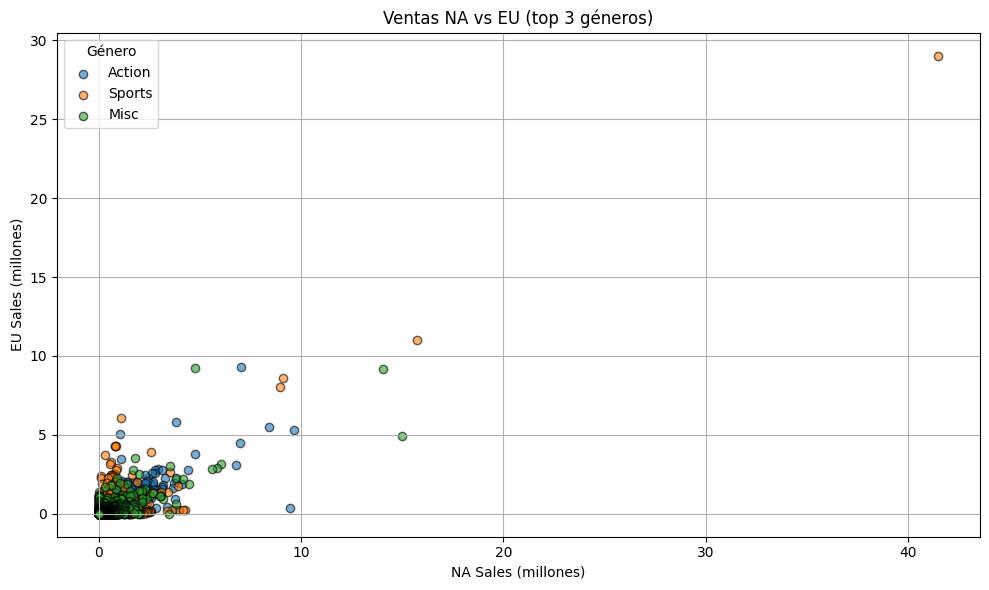

In [36]:
# Primero elegir los 3 géneros más comunes
top_3= df["Genre"].value_counts().head(3).index

plt.figure(figsize=(10, 6))

for genero in top_3:
    subset = df[df["Genre"] == genero]
    plt.scatter(subset["NA_Sales"], subset["EU_Sales"],
                label=genero, alpha=0.6, edgecolor="black")

plt.title("Ventas NA vs EU (top 3 géneros)")
plt.xlabel("NA Sales (millones)")
plt.ylabel("EU Sales (millones)")
plt.legend(title="Género")
plt.grid(True)
plt.tight_layout()

#Mostrar
plt.show()


* En el gráfico podemos observar el top 3 de los video juegos con más ventas por genero en norte américa y europa.
* Se observa que los videojuegos presentan la mayor concentración en los alrededores de los 5 millones. salvo algunos pocos datos se distancian del centro y destacan unos cuantos de color celeste (acción) y naranjo (deportes).

e) Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.


In [42]:
# Primero debo separa mi DataFrame según las categorías: Baja, Media y Alta
baja = df[df["Categoria_Ventas"] == "Baja"]["Global_Sales"]
media = df[df["Categoria_Ventas"] == "Media"]["Global_Sales"]
alta = df[df["Categoria_Ventas"] == "Alta"]["Global_Sales"]


* En este set de gráficos podemos observar que en las categorías baja y media las tendencias son bastante similares, en cambio para la categoría alta, vemos que la mayor parte de los datos se concentra bajo los 10 millones, y tiene un sato que se sale pasado los 80 millones.

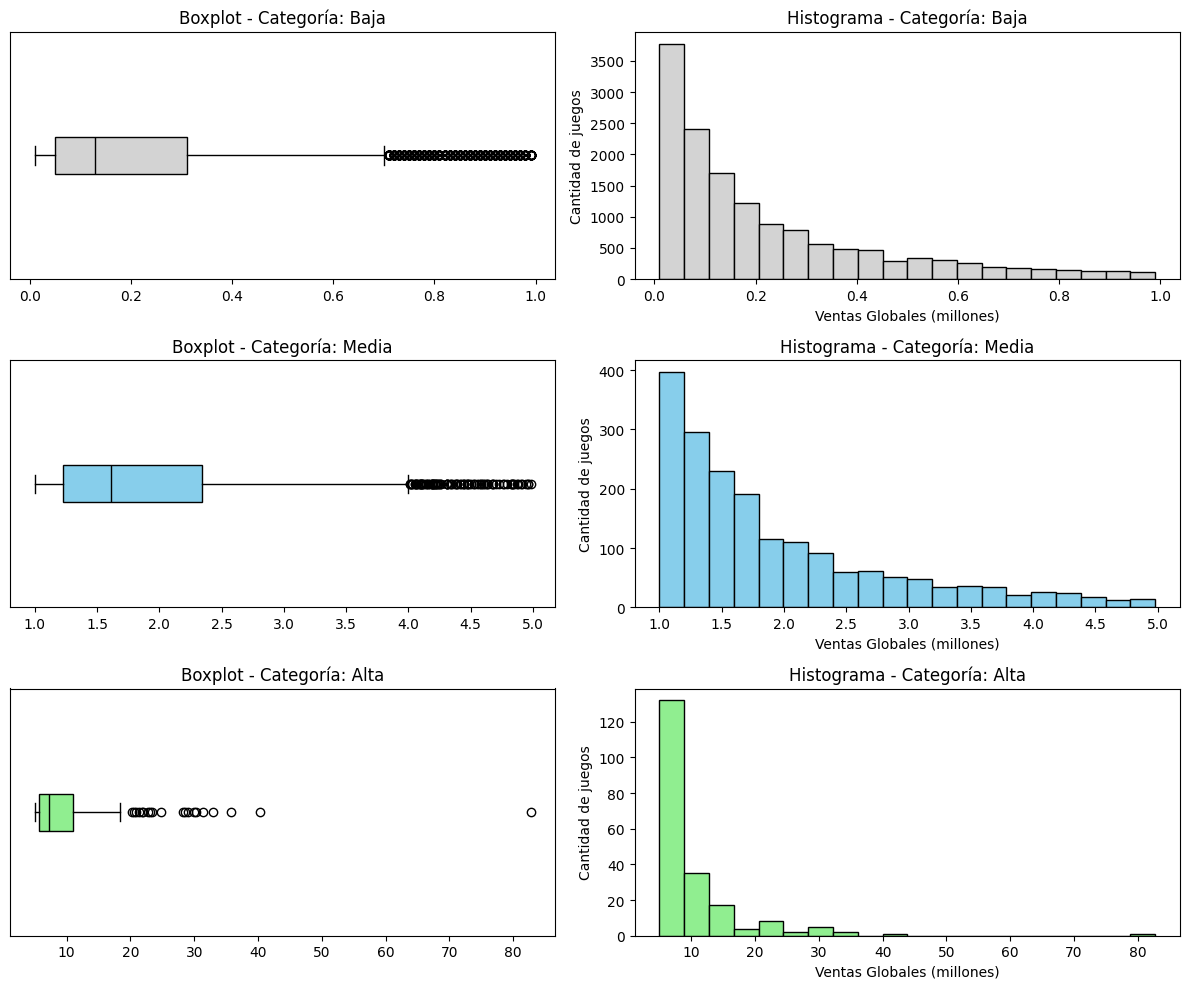

In [44]:
categorias = ["Baja", "Media", "Alta"]
datos = [baja, media, alta]
colores = ["lightgray", "skyblue", "lightgreen"]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

for i in range(3):
    # Boxplot horizontal
    axs[i, 0].boxplot(datos[i], vert=False,
                      patch_artist=True,
                      boxprops=dict(facecolor=colores[i]),
                      medianprops=dict(color="black"))
    axs[i, 0].set_title(f"Boxplot - Categoría: {categorias[i]}")
    axs[i, 0].set_yticks([])

    # Histograma
    axs[i, 1].hist(datos[i], bins=20, color=colores[i], edgecolor="black")
    axs[i, 1].set_title(f"Histograma - Categoría: {categorias[i]}")
    axs[i, 1].set_xlabel("Ventas Globales (millones)")
    axs[i, 1].set_ylabel("Cantidad de juegos")

plt.tight_layout()
# Moatrar
plt.show()


* Outliers: Se observan valores atípicos (outliers) en las tres categorías, lo que nos podría indicar que hay algunos juegos dentro de estas categorías que tienen promedios de ventas por región excepcionalmente altos en comparación con la mayoría de los juegos en su misma categoría.
* Las categorias Baja y Media sus gráficos tienen comportamientos similares, en comparación a la categoría alta que podemos ver que se concentra principalmente bajo los 10 millones y luego presenta una caída drástica.